In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

# data Visualization
import plotly.graph_objs as go
import plotly.offline as py
import matplotlib.ticker as mtick
py.init_notebook_mode(connected=True)

from sklearn import tree
from sklearn.metrics import roc_auc_score, roc_curve, auc, f1_score, precision_recall_curve,accuracy_score,recall_score,precision_score,f1_score
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, Lasso, Ridge, BayesianRidge, ElasticNet, HuberRegressor
from sklearn.ensemble import RandomForestClassifier, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
#sklearn Processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder,StandardScaler

from sklearn.metrics import confusion_matrix,classification_report

#feature select
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.ensemble import ExtraTreesClassifier

# untuk hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV,cross_val_score
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv("finpro.csv") 

In [4]:
df.drop("customerID",axis=1,inplace=True)

In [5]:
#Identifying the rows containing missing data
missing_value_row = list(df[df['TotalCharges'] == " "].index)
print('Missing Value Rows-->', missing_value_row , '\nTotal rows-->', len(missing_value_row))

Missing Value Rows--> [488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754] 
Total rows--> 11


In [6]:
# Replacing the spaces with 0
for missing_row in missing_value_row :
    df['TotalCharges'][missing_row] = 0

In [7]:
df2 = df.copy()

In [8]:
le = LabelEncoder()
le_count = 0
for col in df2.columns[0:]:
    if df2[col].dtype == 'object':
        if len(list(df2[col].unique())) <= 2:
            le.fit(df2[col])
            df2[col] = le.transform(df2[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

6 columns were label encoded.


In [9]:
df2 = pd.get_dummies(df2, drop_first = True)

In [10]:
df_LR = df2.copy()

### 1. Univariate Selection

In [11]:
x_seltest = df_LR.drop(["Churn"],axis=1)
y_seltest = df_LR["Churn"]

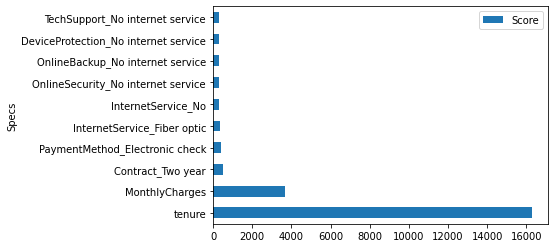

In [25]:
#apply SelectKBest class
bestfeatures = SelectKBest(score_func=chi2, k=6)
fit = bestfeatures.fit(x_seltest,y_seltest)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x_seltest.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
a = featureScores.nlargest(10,'Score') #print 10 best features
a.set_index('Specs', inplace=True)
a.plot(kind='barh')


#### 2. Feature Importance

In [12]:
model = ExtraTreesClassifier()
model.fit(x_seltest,y_seltest)
print(model.feature_importances_)

[1.99656931e-02 1.44736257e-02 1.69337696e-02 ... 1.54369956e-04
 7.00169148e-05 7.28484322e-05]


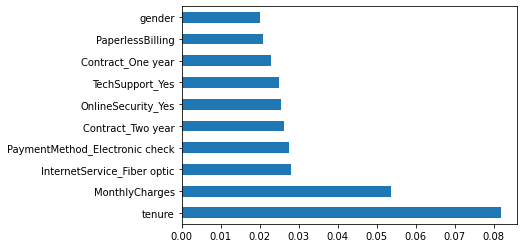

In [13]:
feat_importances = pd.Series(model.feature_importances_, index=x_seltest.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
tenure, monthlycharge,internetoptic,paymendchec,twoyear,

#### 3. Feature Correlation

- Kita menggunakan correlation spearman karna sebagian besar feature data kami categorical/ordinal

In [10]:
corr = df2.corr('spearman')

In [ ]:
# plt.figure(figsize=(20,10))
# df2.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')
# plt.show()

In [ ]:
plt.figure(figsize = (15,8))
sns.heatmap(corr, annot = True)
plt.show()